# Projeto 1 - Ciência dos Dados #

*João Pedro Henneberg Ribeiro - Engenharia 2B*

**Repositório GitHub:** https://github.com/JotaRibeiro?tab=repositories                                                         

**Dados:** https://www.gapminder.org/tools/

# Pergunta Base do Projeto

Países membros da OCDE (Organização para Cooperação e Desenvolvimento Econômico) conseguiram promover crescimento significativo do PIB, juntamente com o IDH nos últimos 20 anos quando comparado a países fora dessa organização?

# Criação da Hipótese

**Base da Hipótese**

A matéria do jornal Estadão relaciona países democraticos com o IDH e PIB dos respectivos, podendo supor que em países desenvolvidos, com grande PIB, como grande parte dos membros da OCDE, o IDH é também elevado.

*Matéria do Jornal:*
https://opiniao.estadao.com.br/noticias/espaco-aberto,o-paradoxo-pib-x-idh-desafio-a-democracia,70002698364

**Hipótese**

Países membros da OCDE (Organização para Cooperação e Desenvolvimento Econômico) conseguiram promover crescimento significativo do PIB, juntamente com o IDH nos últimos 20 anos quando comparado a países fora dessa organização devido ao auxilio econômico mútuo dos países membros.

### Importando as Bibliotecas Necessárias

In [1]:
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### Leitura dos Arquivos em Excel

In [2]:
pib = pd.read_excel('pib_anual.xlsx')
idh = pd.read_excel('idh_paises.xlsx')

### Trocando o Índice das Tabelas

In [3]:
pib_indice = pib.set_index("country")
idh_indice = idh.set_index("country")

### Criando a Tabela dos Países Mebros da OCDE

In [4]:
ocde = ["Austria","Belgium","Canada","Denmark","France","Greece","Iceland","Ireland","Italy","Luxembourg","Netherlands","Norway","Portugal","Spain","Sweden","Switzerland","Turkey","United Kingdom","United States","Germany","Australia","Finland","Japan","New Zealand"]
anos = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

pib_indice.loc[:, "OCDE"] = 0
pib_indice.loc[ocde, "OCDE"] = 1

In [5]:
tabela = idh_indice.join(pib_indice, how="inner", lsuffix="_IDH", rsuffix="_PIB")
tabela = tabela.loc[tabela["OCDE"] == 1]
tabela

,1990_IDH,1991_IDH,1992_IDH,1993_IDH,1994_IDH,1995_IDH,1996_IDH,1997_IDH,1998_IDH,1999_IDH,...,2005_PIB,2006_PIB,2007_PIB,2008_PIB,2009_PIB,2010_PIB,2011_PIB,2012_PIB,2013_PIB,OCDE
country,,,,,,,,,,,,,,,,,,,,,
Australia,0.866,0.867,0.871,0.874,0.876,0.885,0.888,0.891,0.894,0.897,...,3.700,2.93,4.86,2.6000,1.64,3.1400,2.590,3.1900,2.4700,1
Austria,0.794,0.798,0.804,0.806,0.812,0.816,0.819,0.823,0.833,0.833,...,2.530,3.65,3.75,1.3900,-3.77,2.0400,2.530,0.5210,0.2770,1
Belgium,0.805,0.809,0.824,0.838,0.844,0.851,0.856,0.861,0.865,0.869,...,2.070,2.62,2.79,0.8090,-3.02,2.0900,0.690,-0.6740,-0.0943,1
Canada,0.849,0.853,0.855,0.854,0.858,0.860,0.863,0.862,0.861,0.864,...,3.210,2.70,2.08,0.9960,-2.98,2.9800,2.480,1.4900,1.7700,1
Denmark,0.799,0.803,0.808,0.815,0.823,0.830,0.836,0.842,0.848,0.860,...,3.210,3.53,1.71,-0.7950,-5.81,1.6100,1.040,-0.3550,0.5660,1
Finland,0.783,0.786,0.794,0.798,0.808,0.815,0.822,0.830,0.839,0.847,...,3.120,4.42,5.36,0.2960,-8.54,3.3100,2.670,-1.1500,-1.5400,1
France,0.779,0.788,0.798,0.803,0.818,0.825,0.830,0.834,0.839,0.844,...,1.130,2.38,2.24,-0.0600,-3.12,1.7300,1.720,0.0508,0.3390,1
Germany,0.801,0.809,0.814,0.822,0.828,0.834,0.840,0.845,0.850,0.855,...,0.798,4.01,3.49,0.9260,-4.87,4.0400,2.890,0.4400,-0.0344,1
Greece,0.760,0.770,0.771,0.769,0.772,0.774,0.777,0.782,0.792,0.794,...,4.130,5.63,3.64,-1.4900,-3.14,-4.9400,-7.110,-6.7400,-3.1000,1


 ### Criando a Tabela dos Países Não Mebros da OCDE

In [6]:
tabela_mundo = idh_indice.join(pib_indice, how="inner", lsuffix="_IDH", rsuffix="_PIB")
tabela_mundo = tabela_mundo.loc[tabela_mundo["OCDE"] == 0]
tabela_mundo

,1990_IDH,1991_IDH,1992_IDH,1993_IDH,1994_IDH,1995_IDH,1996_IDH,1997_IDH,1998_IDH,1999_IDH,...,2005_PIB,2006_PIB,2007_PIB,2008_PIB,2009_PIB,2010_PIB,2011_PIB,2012_PIB,2013_PIB,OCDE
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,0.338,...,12.400,4.560,13.600,2.500,20.2000,8.040,6.980,14.8000,4.470,0
Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,0.656,...,5.530,5.770,5.850,7.240,3.2800,3.360,2.860,2.6400,2.060,0
Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,0.636,...,5.380,1.720,3.420,2.020,1.7000,3.570,2.310,2.5800,2.990,0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.800,4.970,0.161,-4.220,-5.0600,-3.430,-2.830,NaN,NaN,0
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.382,...,20.500,18.600,23.200,13.800,2.3900,3.450,3.870,4.9600,3.790,0
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.640,12.700,7.010,1.480,-10.7000,-7.580,-1.980,3.8200,1.460,0
Argentina,0.705,0.713,0.720,0.725,0.728,0.731,0.738,0.746,0.753,0.764,...,9.080,8.210,8.390,6.500,0.5980,8.880,8.590,1.6400,3.980,0
Armenia,0.634,0.628,0.595,0.593,0.597,0.603,0.609,0.618,0.632,0.639,...,14.400,13.200,13.700,6.860,-14.8000,1.420,3.940,7.2200,3.270,0
Azerbaijan,NaN,NaN,NaN,NaN,NaN,0.609,0.610,0.615,0.626,0.636,...,25.200,34.600,25.100,10.900,9.3500,5.170,0.119,2.0400,6.210,0


### Fixando o Ano Base 1993

Ano usado como base para a análise do projeto devido aos 20 anos mais recentes que a tabela nos fornece.

Text(0.5, 1.0, 'PIB e IDH de Países Fora da OCDE em 1993')

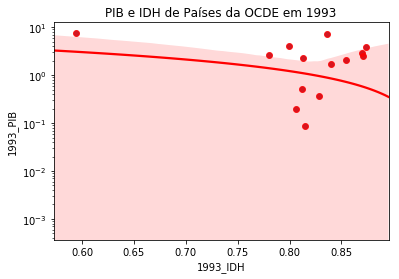

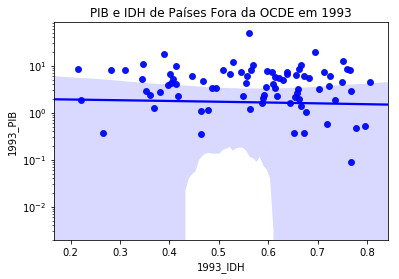

In [21]:
tabela.plot.scatter(x='1993_IDH',y='1993_PIB', logy = True)
sns.regplot(tabela["1993_IDH"],tabela["1993_PIB"], color=('red'))
plt.title("PIB e IDH de Países da OCDE em 1993")

tabela_mundo.plot.scatter(x='1993_IDH',y='1993_PIB', logy = True)
sns.regplot(tabela_mundo["1993_IDH"],tabela_mundo["1993_PIB"], color=('blue'))
plt.title("PIB e IDH de Países Fora da OCDE em 1993")

### Criando a Tabela do Ano 2013

Text(0.5, 1.0, 'PIB e IDH de Países Fora da OCDE em 2013')

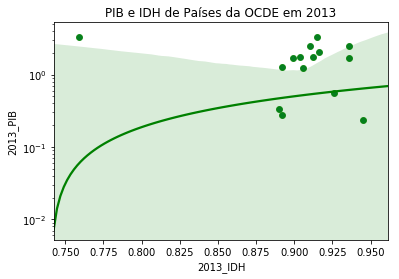

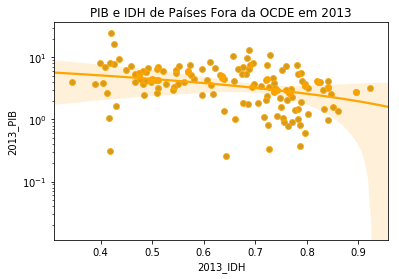

In [8]:
tabela.plot.scatter(x='2013_IDH',y='2013_PIB', logy = True)
sns.regplot(tabela["2013_IDH"],tabela["2013_PIB"], color=('green'))
plt.title("PIB e IDH de Países da OCDE em 2013")

tabela_mundo.plot.scatter(x='2013_IDH',y='2013_PIB', logy = True)
sns.regplot(tabela_mundo["2013_IDH"],tabela_mundo["2013_PIB"], color=('orange'))
plt.title("PIB e IDH de Países Fora da OCDE em 2013")

### Criando o Gráfico BoxPlot de PIB

In [9]:
pib_indice.loc[:,"OCDE"] = "0"
pib_indice.loc[ocde, "OCDE"] = "1"

Text(0, 0.5, 'PIB')

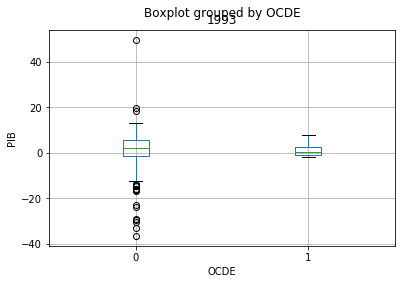

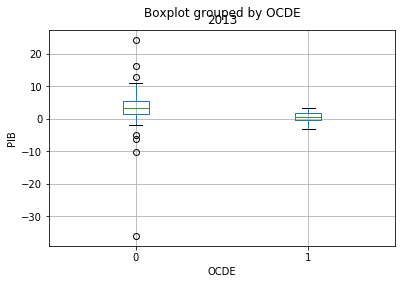

In [10]:
pib_indice.boxplot(column=1993, by="OCDE")
plt.ylabel('PIB')

pib_indice.boxplot(column=2013, by="OCDE")
plt.ylabel('PIB')

### Criando o Gráfico BoxPlot de IDH

In [11]:
idh_indice.loc[:,"OCDE"] = "0"
idh_indice.loc[ocde, "OCDE"] = "1"

Text(0, 0.5, 'IDH')

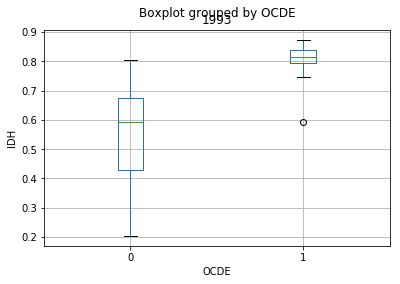

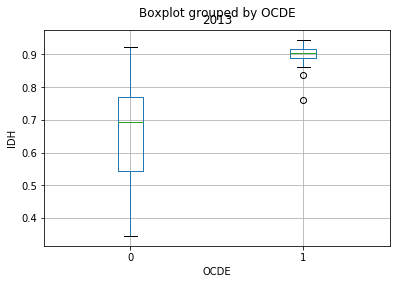

In [12]:
idh_indice.boxplot(column=1993, by="OCDE")
plt.ylabel('IDH')

idh_indice.boxplot(column=2013, by="OCDE")
plt.ylabel('IDH')

### Criando o Histograma de IDH e PIB em 1993

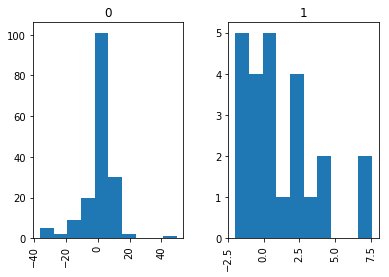

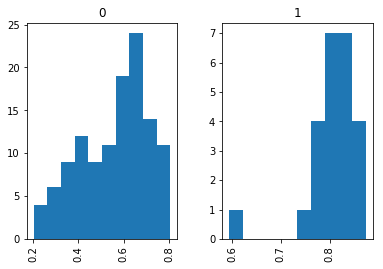

In [13]:
pib_indice.hist(column=1993, by="OCDE");

idh_indice.hist(column=1993, by="OCDE");

### Criando o Histograma de IDH e PIB em 2013

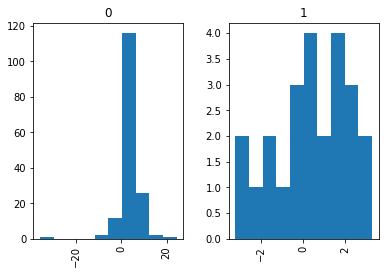

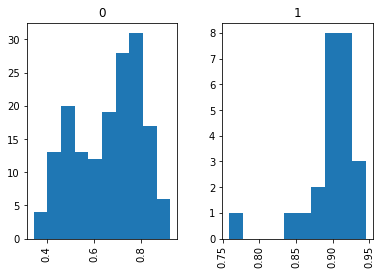

In [14]:
pib_indice.hist(column=2013, by="OCDE");

idh_indice.hist(column=2013, by="OCDE");

### Criando o Gráfico de Dispersão com IDH e PIB Juntos

Para facilitar os códigos foi feito um join, criando uma tabela com todos os países do mundo relacionando o IDH e PIB, como também se estão ou não na OCDE.

In [15]:
tabela_todos = idh_indice.join(pib_indice, how="inner", lsuffix="_IDH", rsuffix="_PIB")
tabela_todos

,1990_IDH,1991_IDH,1992_IDH,1993_IDH,1994_IDH,1995_IDH,1996_IDH,1997_IDH,1998_IDH,1999_IDH,...,2005_PIB,2006_PIB,2007_PIB,2008_PIB,2009_PIB,2010_PIB,2011_PIB,2012_PIB,2013_PIB,OCDE_PIB
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,0.338,...,12.400,4.56,13.600,2.500,20.200,8.040,6.980,14.8000,4.4700,0
Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,0.656,...,5.530,5.77,5.850,7.240,3.280,3.360,2.860,2.6400,2.0600,0
Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,0.636,...,5.380,1.72,3.420,2.020,1.700,3.570,2.310,2.5800,2.9900,0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.800,4.97,0.161,-4.220,-5.060,-3.430,-2.830,NaN,NaN,0
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.382,...,20.500,18.60,23.200,13.800,2.390,3.450,3.870,4.9600,3.7900,0
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.640,12.70,7.010,1.480,-10.700,-7.580,-1.980,3.8200,1.4600,0
Argentina,0.705,0.713,0.720,0.725,0.728,0.731,0.738,0.746,0.753,0.764,...,9.080,8.21,8.390,6.500,0.598,8.880,8.590,1.6400,3.9800,0
Armenia,0.634,0.628,0.595,0.593,0.597,0.603,0.609,0.618,0.632,0.639,...,14.400,13.20,13.700,6.860,-14.800,1.420,3.940,7.2200,3.2700,0
Australia,0.866,0.867,0.871,0.874,0.876,0.885,0.888,0.891,0.894,0.897,...,3.700,2.93,4.860,2.600,1.640,3.140,2.590,3.1900,2.4700,1


**Em 1993:**

Text(0, 0.5, 'IDH')

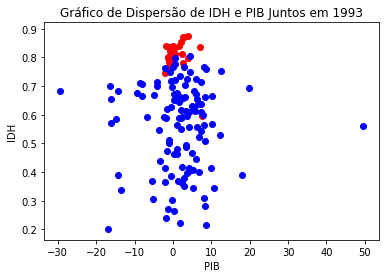

In [16]:
plt.scatter(tabela_todos.loc[tabela_todos.OCDE_PIB=="1", "1993_PIB"], tabela_todos.loc[tabela_todos.OCDE_PIB=="1", "1993_IDH"], color="red")
plt.scatter(tabela_todos.loc[tabela_todos.OCDE_PIB=="0", "1993_PIB"], tabela_todos.loc[tabela_todos.OCDE_PIB=="0", "1993_IDH"], color="blue")
plt.title("Gráfico de Dispersão de IDH e PIB Juntos em 1993")
plt.xlabel('PIB')
plt.ylabel('IDH')

**Em 2013:**

Text(0, 0.5, 'IDH')

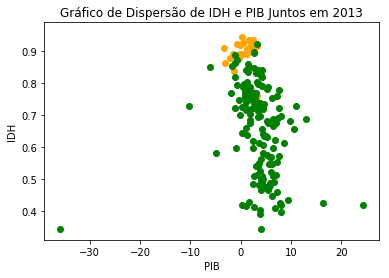

In [17]:
plt.scatter(tabela_todos.loc[tabela_todos.OCDE_PIB=="1", "2013_PIB"], tabela_todos.loc[tabela_todos.OCDE_PIB=="1", "2013_IDH"], color="orange")
plt.scatter(tabela_todos.loc[tabela_todos.OCDE_PIB=="0", "2013_PIB"], tabela_todos.loc[tabela_todos.OCDE_PIB=="0", "2013_IDH"], color="green")
plt.title("Gráfico de Dispersão de IDH e PIB Juntos em 2013")
plt.xlabel('PIB')
plt.ylabel('IDH')

### Gráficos Conclusivos Finais

Ajuste de retas no gráfico de dispersão

In [18]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()

**Em 1993:**

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.8136975877240084
Coeficiente angular: -0.004244910266789337
Ajuste linear entre X3 e X4:
Coeficiente linear: 0.5592607741531327
Coeficiente angular: -0.0001587895547911719


Text(27.175000000000004, 0.5, 'IDH')

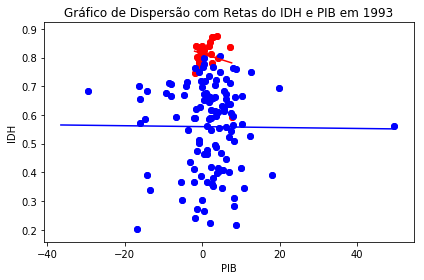

In [19]:
plt.scatter(tabela_todos.loc[tabela_todos.OCDE_PIB=="1", "1993_PIB"], tabela_todos.loc[tabela_todos.OCDE_PIB=="1", "1993_IDH"], color="red")
reta(tabela_todos.loc[tabela_todos.OCDE_PIB=="1", "1993_PIB"], tabela_todos.loc[tabela_todos.OCDE_PIB=="1", "1993_IDH"], "red")
plt.scatter(tabela_todos.loc[tabela_todos.OCDE_PIB=="0", "1993_PIB"], tabela_todos.loc[tabela_todos.OCDE_PIB=="0", "1993_IDH"], color="blue")
reta(tabela_todos.loc[tabela_todos.OCDE_PIB=="0", "1993_PIB"], tabela_todos.loc[tabela_todos.OCDE_PIB=="0", "1993_IDH"], "blue")
plt.title("Gráfico de Dispersão com Retas do IDH e PIB em 1993")
plt.xlabel('PIB')
plt.ylabel('IDH')

**Em 2013:**

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.8961631694025127
Coeficiente angular: 0.0013613954563276996
Ajuste linear entre X3 e X4:
Coeficiente linear: 0.6814907758926347
Coeficiente angular: -0.005531444907517456


Text(27.175000000000004, 0.5, 'IDH')

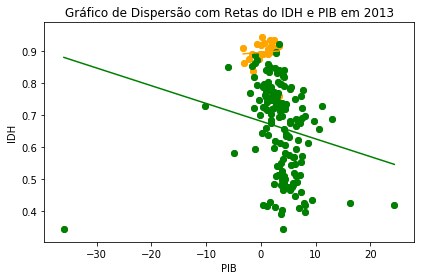

In [20]:
plt.scatter(tabela_todos.loc[tabela_todos.OCDE_PIB=="1", "2013_PIB"], tabela_todos.loc[tabela_todos.OCDE_PIB=="1", "2013_IDH"], color="orange")
reta(tabela_todos.loc[tabela_todos.OCDE_PIB=="1", "2013_PIB"], tabela_todos.loc[tabela_todos.OCDE_PIB=="1", "2013_IDH"], "orange")
plt.scatter(tabela_todos.loc[tabela_todos.OCDE_PIB=="0", "2013_PIB"], tabela_todos.loc[tabela_todos.OCDE_PIB=="0", "2013_IDH"], color="green")
reta(tabela_todos.loc[tabela_todos.OCDE_PIB=="0", "2013_PIB"], tabela_todos.loc[tabela_todos.OCDE_PIB=="0", "2013_IDH"], "green")
plt.title("Gráfico de Dispersão com Retas do IDH e PIB em 2013")
plt.xlabel('PIB')
plt.ylabel('IDH')

# Conclusões

Ao observar os dados da tabela de IDH e PIB de 1993 a 2013 de países dentro da OCDE e fora, podemos concluir que estão sim relacionados com a participação ou não da organização.

Ao longo dos 20 anos analisados, percebemos que há um aumento da relação IDH x PIB dos países participantes da OCDE quando comparado a países fora desse grupo, evidenciado pela linha amarela e pela verde do gráfico final de 2013.

Como o principal objetivo da OCDE é o desenvolvimento econômico a partir de trocas de experiências e ajuda mútua entre os países, é comum de se esperar que o Produto Interno Bruto desses países cresça substancialmente nesse período de 20 anos.

Além do mais, fazem parte dessa organização os países mais bem desenvolvidos do mundo, conseguindo conciliar o alto PIB com um bom IDH tanto em 1993, evidenciado pelos pontos vermelhos no gráfico de dispersão, quanto em 2013, evidenciado pelos pontos amarelos no outro gráfico de dispersão. Como esse alto PIB é investido em grande parte no bem-estar da população, o IDH é resultado desse investimento.

Portando, pode-se concluir que o desenvolvimento econômico dos países membros da OCDE promove um aumento significativo do PIB que resulta em um maior IDH.